<a href="https://colab.research.google.com/github/pq2312/Company-Classification-Based-On-Financial-Data/blob/main/Company_Classification_Based_On_Financial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Company Classification Based On Financial Data


**EXECUTIVE SUMMARY**

The objective of this project is to develop a model capable of accurately classifying companies into their respective industries based on financial data. Utilizing a dataset sourced from Compustat, comprising financial information from 516 companies for the year 2022, the study encompasses four distinct industries: metal mining, manufacturing, retail, and software development. Seven key ratios have been incorporated into the dataset to facilitate classification.

Throughout the project, four models were constructed and rigorously tested. Among these models, Model 2 emerges as the most promising candidate, employing three predictive variables—COGS, PPE, and ATR. Model 2 achieves an impressive accuracy rate of 74%, while maintaining simplicity through the utilization of a small number of variables. Conversely, the remaining models either demonstrate lower accuracy rates (Model 1 and 4) or exhibit increased complexity (Model 3, which incorporates four variables).

From an accounting and finance standpoint, the selected ratios prove instrumental in effectively distinguishing between industries. For instance, in the software development sector, where services are predominant, lower levels of COGS and PPE are anticipated compared to other industries. Similarly, the retail industry typically operates with a faster revenue cycle and lower asset deployment in contrast to metal mining and manufacturing sectors.

In conclusion, this project not only presents a successful application of machine learning techniques for industry classification based on financial data but also underscores the significance of tailored financial metrics in capturing the unique characteristics of diverse business sectors.

## Step 1: Import Necessary Libraries andf Packages

In [ ]:
# import libraries
from google.colab import files
import pandas as pd
import numpy as np
# libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Read file into Pandas DataFrame

In [ ]:
# store the dataset in "assign1TuTh.csv" as a panda dataframe named df
df = pd.read_csv('assign1TuTh.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ind                  516 non-null    int64  
 1   ticker               516 non-null    object 
 2   COGS_Frac            516 non-null    float64
 3   SGA_Frac             516 non-null    float64
 4   Inventory_Assets     516 non-null    float64
 5   PPE_Assets           516 non-null    float64
 6   LongTermDebt_Assets  516 non-null    float64
 7   ATR                  516 non-null    float64
 8   log_Size             516 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 36.4+ KB


**Comments:** There is no "N/A" value in the dataset.

## Step 3: Inspect the variables

In [ ]:
df.describe()

,ind,COGS_Frac,SGA_Frac,Inventory_Assets,PPE_Assets,LongTermDebt_Assets,ATR,log_Size
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,3.988372,0.591959,0.408041,0.115081,0.255780,0.198428,0.907719,6.303572
std,2.135202,0.264087,0.264087,0.127293,0.246548,0.244597,0.833978,2.537985
min,1.000000,0.001517,0.011377,0.000000,0.000000,0.000000,0.000176,-3.170086
25%,3.000000,0.386002,0.189835,0.008937,0.070039,0.021981,0.423760,4.742304
50%,3.000000,0.662988,0.337012,0.075136,0.149917,0.138042,0.691966,6.543533
75%,5.000000,0.810165,0.613998,0.183567,0.412352,0.292361,1.086648,8.096422
max,7.000000,0.988623,0.998483,0.781892,0.951993,2.175809,4.862069,13.044780


## Step 4: Graph the frequencies of each industry (Both training and validation samples)

<Axes: >

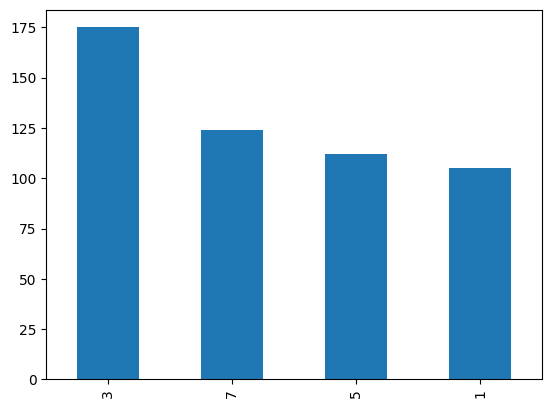

In [ ]:
df.ind.value_counts().plot(kind = 'bar')

## Example of scatter/cluster plots in 2 dimensions of possible explanatory variables (financial ratios)


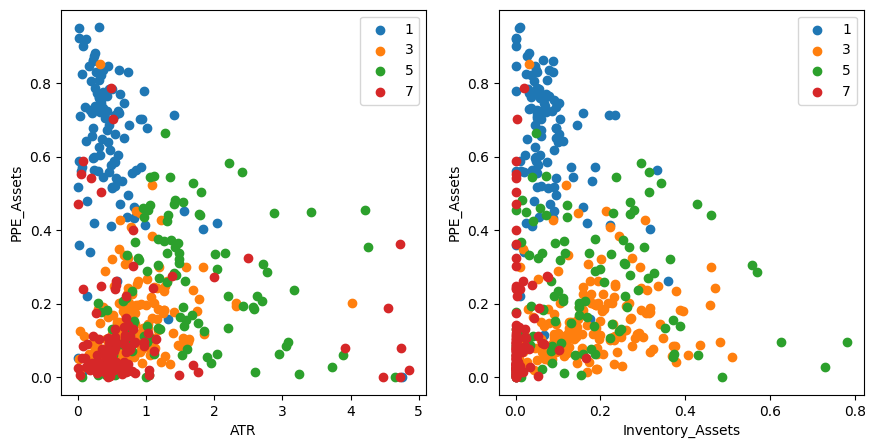

In [ ]:
fig = plt.figure(figsize=(16, 5))
a = fig.add_subplot(1, 3, 1)
for i in df.ind.unique():
  a.scatter(x = 'ATR', y = 'PPE_Assets', data = df[df.ind == i], label = i)
  plt.legend(loc = 'upper right')
  plt.xlabel('ATR')
  plt.ylabel('PPE_Assets')

b = fig.add_subplot(1, 3, 2)
for i in df.ind.unique():
  b.scatter(x = 'Inventory_Assets', y = 'PPE_Assets', data = df[df.ind == i], label = i)
  plt.legend(loc = 'upper right')
  plt.xlabel('Inventory_Assets')
  plt.ylabel('PPE_Assets')


**First look at the variables and check for outliers**

In [ ]:
df.groupby('ind').mean()

<ipython-input-40-95adc6691663>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('ind').mean()


,COGS_Frac,SGA_Frac,Inventory_Assets,PPE_Assets,LongTermDebt_Assets,ATR,log_Size
ind,,,,,,,
1,0.770388,0.229612,0.074449,0.630442,0.113415,0.505802,6.434868
3,0.665917,0.334083,0.176217,0.150947,0.214018,0.828244,6.868593
5,0.603222,0.396778,0.175033,0.230315,0.253746,1.533326,6.118199
7,0.326319,0.673681,0.009056,0.109477,0.198448,0.795150,5.562418



**Analysis Summary:**

The analysis reveals significant variations in financial ratios across four industries: metal mining, manufacturing, retail, and software development.

1.   **COGS_Frac Ratio**: Software development firms exhibit notably lower COGS_Frac ratios compared to other industries. This can be attributed to the service-oriented nature of software firms, resulting in lower costs of goods sold. In contrast, the metal mining industry demonstrates the highest COGS over total operation cost at 80%, reflecting its reliance on tangible goods.

2.   **SGA_Frac Ratio**: Software development firms show the highest SGA_Frac ratio at 67%, significantly exceeding other industries by 2-3 times. This disparity underscores the unique cost structures within the software sector, likely driven by intensive spending on sales, general, and administrative activities. Considering that the sum of COGS_Frac and SGA_Frac is 1, it's advisable to use either ratio for modeling purposes, but not both.

3.   **Inventory_Assets Ratio**: Manufacturing and retail industries exhibit the highest levels of inventory in their assets base, whereas software companies maintain minimal inventory due to their service-oriented nature. This ratio proves effective in distinguishing industries based on their inventory management practices.

4.   **PPE_Assets Ratio**: There is a significant discrepancy in the average PPE_Assets ratio between the metal mining industry and other sectors, particularly software development. This highlights differences in asset utilization and capital expenditure patterns, making it a valuable indicator for industry classification.

5.   **LongTermDebt_Assets Ratio**: Across industries, average LongTermDebt_Assets ratios remain relatively similar, ranging from 0.11 to 0.25. Consequently, this ratio may not serve as a strong predictor of industry classification.

6.   **ATR (Asset Turnover Ratio)**: ATR emerges as a distinguishing factor for the retail industry, with a significantly higher value compared to other sectors. This aligns with the retail sector's characteristic of generating substantial sales with relatively lower asset levels.

7.   **log_Size Ratio**: This ratio exhibits consistent values across industries and may not offer significant discriminatory power for modeling purposes.

In conclusion, several key ratios including COGS_Frac, SGA_Frac, Inventory_Assets, PPE_Assets, and ATR demonstrate potential utility in building a classification model for industries based on financial data. These ratios capture essential differences in operational and financial characteristics among diverse industry segments.

**Detect outliers using boxplot**

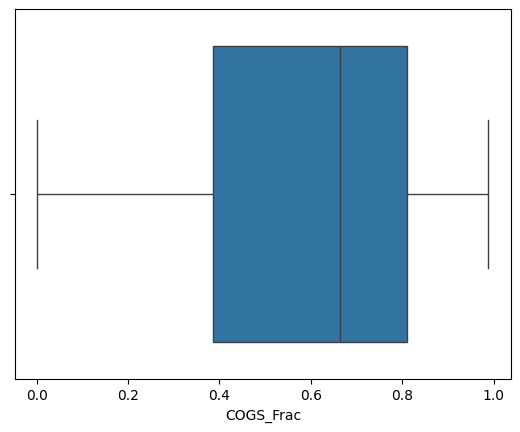

In [ ]:
sns.boxplot(x=df['COGS_Frac'])
plt.show()

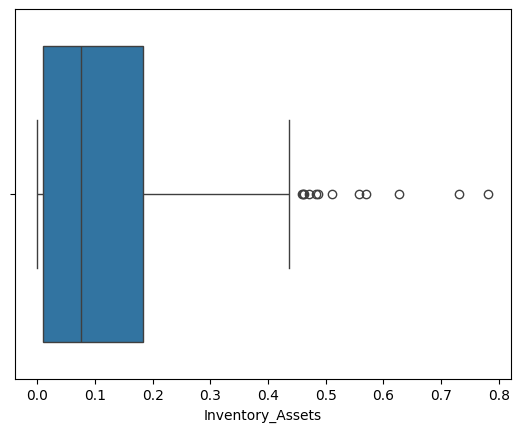

In [ ]:
sns.boxplot(x=df['Inventory_Assets'])
plt.show()

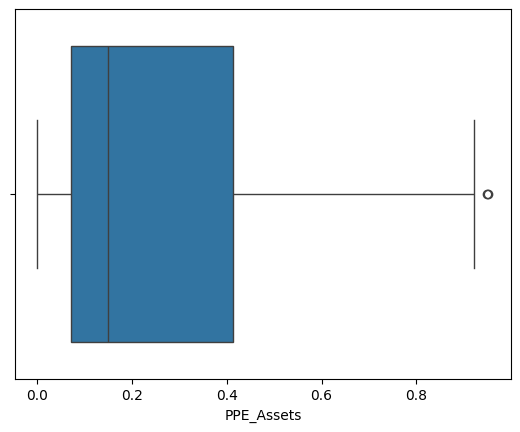

In [ ]:
sns.boxplot(x=df['PPE_Assets'])
plt.show()

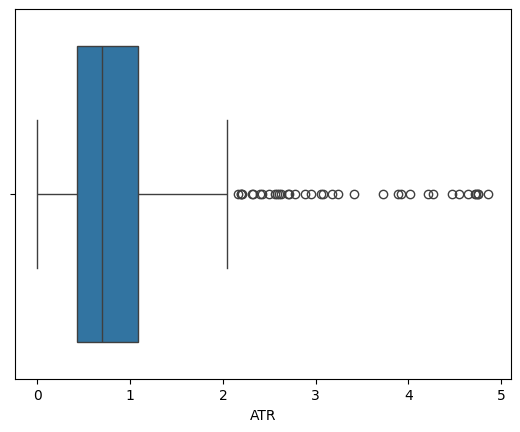

In [ ]:
sns.boxplot(x=df['ATR'])
plt.show()

## Start prepping data for logistic regression analysis

**Model 1: ATR and PPE_Assets**


In [ ]:
# Input/independent variables

# here we are dropping the quality feature as this is the target and 'X' is input features, the changes are not
# made inplace as we have not used 'inplace = True'

X = df[['ATR', 'PPE_Assets']]

# NOTE: You will change the above line to add/subtract explanatory variables

# Output/Dependent variable (predict industry category)
y = df.ind

In [ ]:
# Let's check the shapes of X and y


# Important: You will have additional dimensiopns when you add variables

print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (516, 2) Dimension:  2
Shape:  (516,) Dimension:  1


## Divide data into Testing and Validation samples

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# split the data

# Note that we have Train sample and Test (Validation) sample
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.

# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

In [ ]:
# import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression



In [ ]:
log_model = LogisticRegression()

## Estimate the best fit logistic regression on Training data

In [ ]:
# Fit the model on the training data
log_model.fit(X_train, y_train)



LogisticRegression()

In [ ]:
predictions = log_model.predict(X_test)

## Now examine how well the model worked on Validation sample

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[35,  4,  1,  0],
       [ 1, 46,  1,  0],
       [ 0, 15, 13,  0],
       [ 3, 34,  2,  0]])

In [ ]:
from sklearn.metrics import accuracy_score

## Determine accuracy score for Validation sample

In [ ]:
accuracy_score(y_test, predictions)

0.6064516129032258

**Model 2: COGS_Frac, ATR and PPE_Assets**

Repeat similar steps of Model 1 above but this time we use 3 variables which are COGS_Frac, ATR and PPE_Assets.

In [ ]:
# Input/independent variables

X2 = df[['COGS_Frac', 'ATR', 'PPE_Assets']]

# Output/Dependent variable (predict industry category)
y2 = df.ind

In [ ]:
# Let's check the shapes of X2 and y2

print("Shape: ", X2.shape, "Dimension: ", X2.ndim)
print("Shape: ", y2.shape, "Dimension: ", y2.ndim)

Shape:  (516, 3) Dimension:  2
Shape:  (516,) Dimension:  1


In [ ]:
# split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state = 42)

In [ ]:
# Fit the model on the training data
log_model.fit(X2_train, y2_train)

LogisticRegression()

In [ ]:
predictions2 = log_model.predict(X2_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y2_test, predictions2)

array([[34,  3,  1,  2],
       [ 0, 43,  2,  3],
       [ 0, 12, 11,  5],
       [ 2,  9,  2, 26]])

In [ ]:
accuracy_score(y2_test, predictions2)

0.7354838709677419

**Model 3: COGS_Frac, Inventory_Assets, ATR and PPE_Assets**

Repeat similar steps of Model 1 above but this time we use 4 variables which are COGS_Frac, Inventory_Assets, ATR and PPE_Assets

In [ ]:
# Input/independent variables

X3 = df[['COGS_Frac', 'Inventory_Assets', 'ATR', 'PPE_Assets']]

# Output/Dependent variable (predict industry category)
y3 = df.ind

In [ ]:
# Let's check the shapes of X and y

print("Shape: ", X3.shape, "Dimension: ", X3.ndim)
print("Shape: ", y3.shape, "Dimension: ", y3.ndim)

Shape:  (516, 4) Dimension:  2
Shape:  (516,) Dimension:  1


In [ ]:
# split the data

X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.3, random_state = 42)

In [ ]:
# Fit the model on the training data
log_model.fit(X3_train, y3_train)

LogisticRegression()

In [ ]:
predictions3 = log_model.predict(X3_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y3_test, predictions3)

array([[34,  3,  1,  2],
       [ 0, 43,  3,  2],
       [ 0, 13, 11,  4],
       [ 2,  9,  0, 28]])

In [ ]:
accuracy_score(y3_test, predictions3)

0.7483870967741936

**Model 4: COGS_Frac, Inventory_Assets and PPE_Assets**

Repeat similar steps of Model 1 above but this time we use 3 variables which are COGS_Frac, Inventory_Assets and PPE_Assets. This is because ATR appears to have mutiple outliers.

In [ ]:
# Input/independent variables

X4 = df[['COGS_Frac','Inventory_Assets', 'PPE_Assets']]

# Output/Dependent variable (predict industry category)
y4 = df.ind

In [ ]:
# Let's check the shapes of X and y

print("Shape: ", X4.shape, "Dimension: ", X4.ndim)
print("Shape: ", y4.shape, "Dimension: ", y4.ndim)

Shape:  (516, 3) Dimension:  2
Shape:  (516,) Dimension:  1


In [ ]:
# split the data

X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.3, random_state = 42)

In [ ]:
# Fit the model on the training data
log_model.fit(X4_train, y4_train)

LogisticRegression()

In [ ]:
predictions4 = log_model.predict(X4_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y4_test, predictions4)

array([[32,  4,  2,  2],
       [ 1, 43,  2,  2],
       [ 3, 18,  1,  6],
       [ 2,  9,  0, 28]])

In [ ]:
accuracy_score(y4_test, predictions4)

0.6709677419354839

As presented above, four models were constructed and rigorously tested. Among these models, Model 2 emerges as the most promising candidate, employing three predictive variables—COGS, PPE, and ATR. Model 2 achieves an impressive accuracy rate of 74%, while maintaining simplicity through the utilization of a small number of variables. Conversely, the remaining models either demonstrate lower accuracy rates (Model 1 and 4) or exhibit increased complexity (Model 3, which incorporates four variables).